In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle # creating a kaggle directory

In [3]:
!cp kaggle.json ~/.kaggle # copying json file to folder

In [4]:
#from kaggle dataset field copy API command
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 146MB/s]


In [5]:
!unzip /content/diabetes-health-indicators-dataset.zip

Archive:  /content/diabetes-health-indicators-dataset.zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [8]:
df.shape

(253680, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
df.corr()

Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271596  0.209085   0.067546  0.224379   
HighBP                    0.271596  1.000000  0.298199   0.098508  0.213748   
HighChol                  0.209085  0.298199  1.000000   0.085642  0.106722   
CholCheck                 0.067546  0.098508  0.085642   1.000000  0.034495   
BMI                       0.224379  0.213748  0.106722   0.034495  1.000000   
Smoker                    0.062914  0.096991  0.091299  -0.009929  0.013804   
Stroke                    0.107179  0.129575  0.092620   0.024158  0.020153   
HeartDiseaseorAttack      0.180272  0.209361  0.180765   0.044206  0.052904   
PhysActivity             -0.121947 -0.125267 -0.078046   0.004190 -0.147294   
Fruits                   -0.042192 -0.040555 -0.040859   0.023849 -0.087518   
Veggies                  -0.058972 -0.061266 -0.039874   0.006121 -0.062275   
HvyAlcoholConsump        -0.057882 -0.003972 -0.011543  -0.023730 -0.048736   
AnyHealthcare             0.015410  0.038425  0.042230   0.117626 -0.018471   
NoDocbcCost               0.035436  0.017358  0.013310  -0.058255  0.058206   
GenHlth                   0.302587  0.300530  0.208426   0.046589  0.239185   
MentHlth                  0.073507  0.056456  0.062069  -0.008366  0.085310   
PhysHlth                  0.176287  0.161212  0.121751   0.031775  0.121141   
DiffWalk                  0.224239  0.223618  0.144672   0.040585  0.197078   
Sex                       0.031040  0.052207  0.031205  -0.022115  0.042950   
Age                       0.185026  0.344452  0.272318   0.090321 -0.036618   
Education                -0.130517 -0.141358 -0.070802   0.001510 -0.103932   
Income                   -0.171483 -0.171235 -0.085459   0.014259 -0.100069   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Diabetes_012          0.062914  0.107179              0.180272     -0.121947   
HighBP                0.096991  0.129575              0.209361     -0.125267   
HighChol              0.091299  0.092620              0.180765     -0.078046   
CholCheck            -0.009929  0.024158              0.044206      0.004190   
BMI                   0.013804  0.020153              0.052904     -0.147294   
Smoker                1.000000  0.061173              0.114441     -0.087401   
Stroke                0.061173  1.000000              0.203002     -0.069151   
HeartDiseaseorAttack  0.114441  0.203002              1.000000     -0.087299   
PhysActivity         -0.087401 -0.069151             -0.087299      1.000000   
Fruits               -0.077666 -0.013389             -0.019790      0.142756   
Veggies              -0.030678 -0.041124             -0.039167      0.153150   
HvyAlcoholConsump     0.101619 -0.016950             -0.028991      0.012392   
AnyHealthcare        -0.023251  0.008776              0.018734      0.035505   
NoDocbcCost           0.048946  0.034804              0.031000     -0.061638   
GenHlth               0.163143  0.177942              0.258383     -0.266186   
MentHlth              0.092196  0.070172              0.064621     -0.125587   
PhysHlth              0.116460  0.148944              0.181698     -0.219230   
DiffWalk              0.122463  0.176567              0.212709     -0.253174   
Sex                   0.093662  0.002978              0.086096      0.032482   
Age                   0.120641  0.126974              0.221618     -0.092511   
Education            -0.161955 -0.076009             -0.099600      0.199658   
Income               -0.123937 -0.128599             -0.141011      0.198539   

                        Fruits  ...  AnyHealthcare  NoDocbcCost   GenHlth  \
Diabetes_012         -0.042192  ...       0.015410     0.035436  0.302587   
HighBP               -0.040555  ...       0.038425     0.017358  0.300530   
HighChol             -0.040859  ...       0.042230     0.013310  0.208426   
CholCheck             0.023849  ...       0.117626    -

In [12]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

<Axes: >

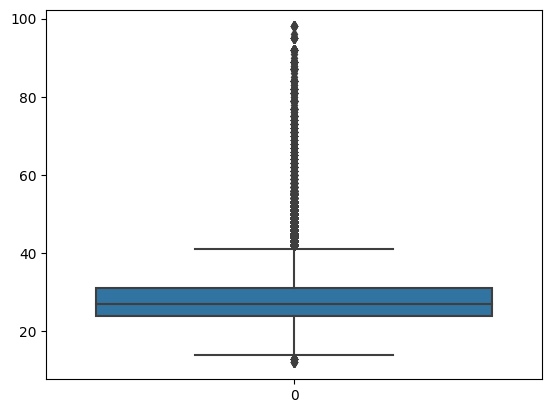

In [13]:
sns.boxplot(df['BMI'])

<Axes: >

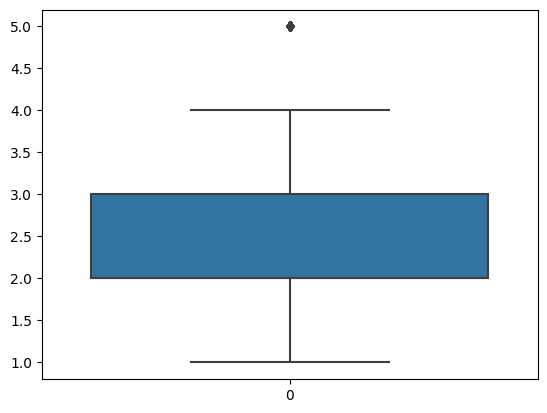

In [14]:
sns.boxplot(df['GenHlth'])

<Axes: >

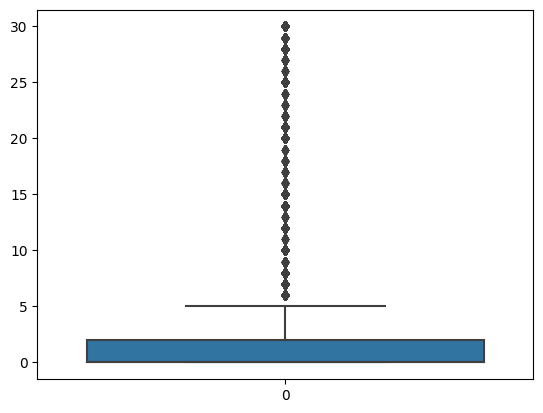

In [15]:
sns.boxplot(df['MentHlth'])

<Axes: >

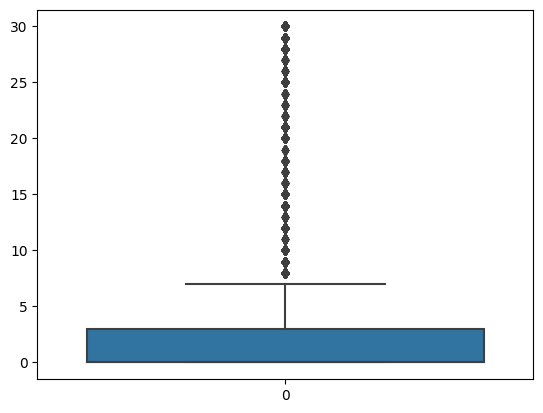

In [16]:
sns.boxplot(df['PhysHlth'])

In [ ]:
sns.pairplot(df)

<Axes: >

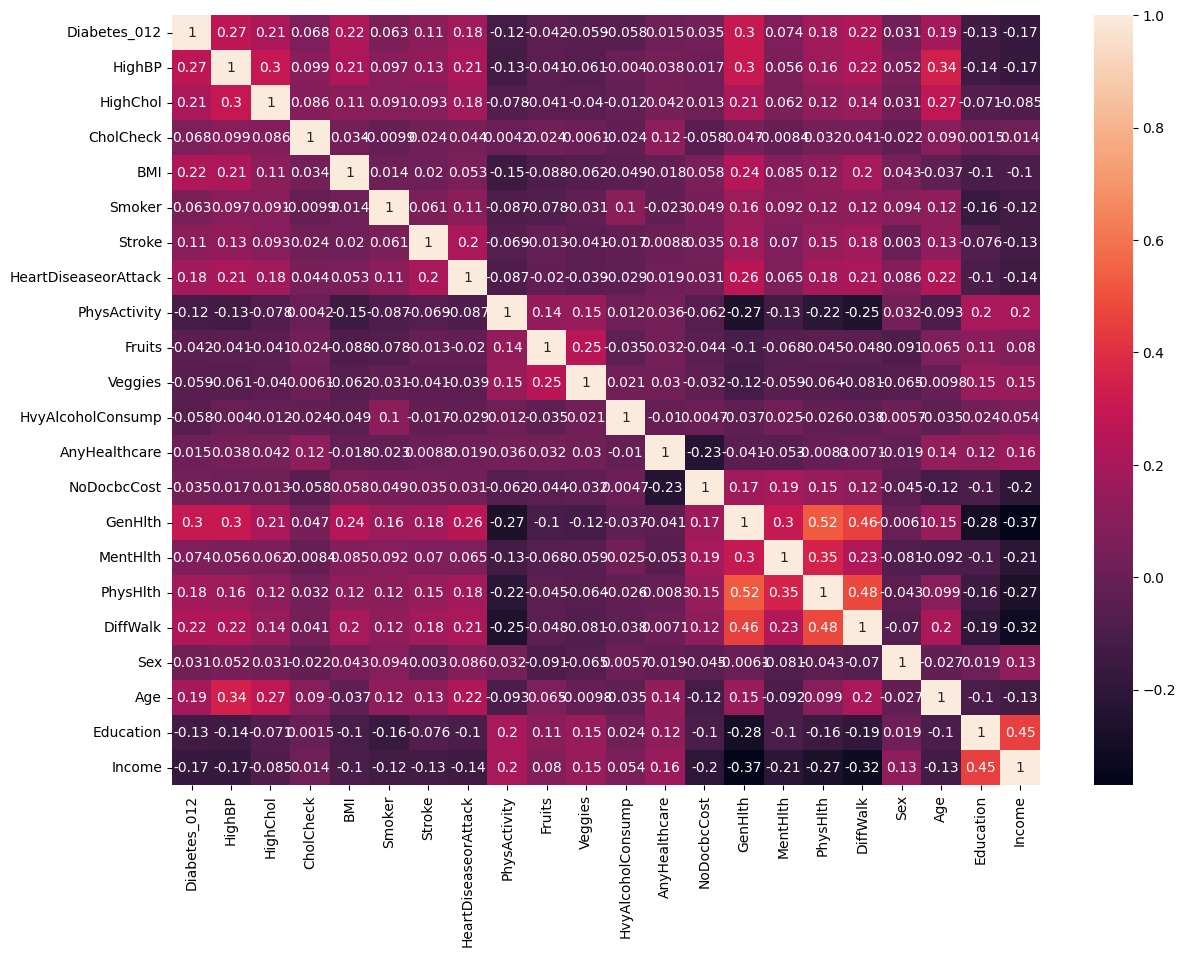

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [19]:
duplicate = df[df.duplicated()]
print("Duplicates: ",len(duplicate))

Duplicates:  23899


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
duplicate = df[df.duplicated()]
print("Duplicates: ",len(duplicate))

Duplicates:  0


In [24]:
df.Diabetes_012.value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

<Axes: title={'center': 'Label Distribution'}>

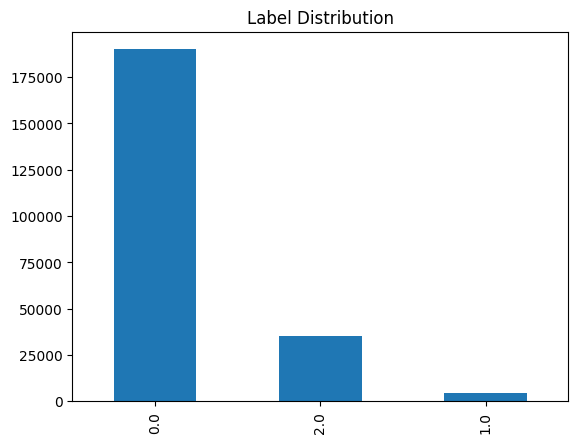

In [28]:
df['Diabetes_012'].value_counts().plot(kind='bar',title='Label Distribution')

<Axes: title={'center': 'Label Distribution'}>

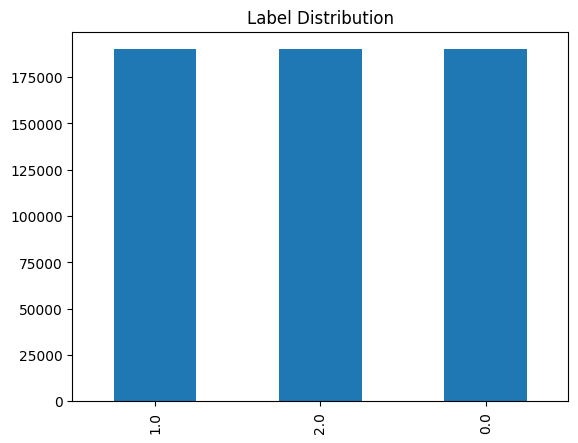

In [29]:
class_0 = df[df.Diabetes_012 == 0]
class_1 = df[df.Diabetes_012 == 1]
class_2 = df[df.Diabetes_012 == 2]
class_1_over = class_1.sample(len(class_0),replace=True)
class_2_over = class_2.sample(len(class_0),replace=True)
df_new = pd.concat([class_1_over,class_2_over,class_0],axis=0)
df_new.Diabetes_012.value_counts().plot(kind='bar',title='Label Distribution')

In [30]:
X = df_new.iloc[:,1:-2]

In [31]:
X.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
240988     1.0       0.0        1.0  45.0     1.0     0.0   
160836     0.0       1.0        1.0  25.0     0.0     0.0   
99565      1.0       1.0        1.0  35.0     1.0     0.0   
65539      1.0       1.0        1.0  33.0     0.0     0.0   
135869     1.0       1.0        1.0  32.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
240988                   0.0           1.0     1.0      1.0   
160836                   0.0           0.0     1.0      1.0   
99565                    0.0           0.0     0.0      1.0   
65539                    0.0           0.0     1.0      1.0   
135869                   0.0           1.0     1.0      1.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
240988                0.0            1.0          1.0      4.0       0.0   
160836                0.0            1.0          0.0      4.0      30.0   
99565                 0.0            1.0          0.0      4.0       3.0   
65539                 0.0            1.0          0.0      2.0       0.0   
135869                0.0            1.0          0.0      4.0      18.0   

        PhysHlth  DiffWalk  Sex   Age  
240988      30.0       1.0  0.0   9.0  
160836      30.0       1.0  0.0  10.0  
99565        0.0       0.0  0.0   8.0  
65539        0.0       0.0  0.0  11.0  
135869      30.0       0.0  1.0  10.0

In [32]:
y = df_new.Diabetes_012

In [33]:
y.head()

240988    1.0
160836    1.0
99565     1.0
65539     1.0
135869    1.0
Name: Diabetes_012, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=13)

In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(x_train)
X_test = scalar.fit_transform(x_test)

In [36]:
X_train.shape

(484640, 19)

In [37]:
X_test.shape

(85525, 19)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=13)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=13)

In [40]:
y_pred1 = rfc.predict(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_pred2 = lr.predict(X_test)

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20,random_state=13)

In [45]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
y_pred3 = xgb.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
as1 = accuracy_score(y_test,y_pred1)
as2 = accuracy_score(y_test,y_pred2)
as3 = accuracy_score(y_test,y_pred3)

In [49]:
as1

0.9337503653902368

In [50]:
as2

0.5073838059047062

In [51]:
as3

0.3474773458053201

In [52]:
pd.crosstab(y_test,y_pred1)

col_0           0.0    1.0    2.0
Diabetes_012                     
0.0           23951    567   3933
1.0               0  28435      3
2.0             659    504  27473

In [53]:
pd.crosstab(y_test,y_pred2)

col_0           0.0   1.0    2.0
Diabetes_012                    
0.0           18255  5032   5164
1.0            8396  8375  11667
2.0            5093  6779  16764

In [54]:
pd.crosstab(y_test,y_pred3)

col_0             0    1    2
Diabetes_012                 
0.0           28172  169  110
1.0           27491  630  317
2.0           26988  732  916

In [55]:
from sklearn.metrics import classification_report
classificationreport1 = classification_report(y_test,y_pred1)
classificationreport2 = classification_report(y_test,y_pred2)
classificationreport3 = classification_report(y_test,y_pred3)

In [56]:
print(classificationreport1)

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     28451
         1.0       0.96      1.00      0.98     28438
         2.0       0.87      0.96      0.92     28636

    accuracy                           0.93     85525
   macro avg       0.94      0.93      0.93     85525
weighted avg       0.94      0.93      0.93     85525



In [57]:
print(classificationreport2)

              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61     28451
         1.0       0.41      0.29      0.34     28438
         2.0       0.50      0.59      0.54     28636

    accuracy                           0.51     85525
   macro avg       0.50      0.51      0.50     85525
weighted avg       0.50      0.51      0.50     85525



In [58]:
print(classificationreport3)

              precision    recall  f1-score   support

         0.0       0.34      0.99      0.51     28451
         1.0       0.41      0.02      0.04     28438
         2.0       0.68      0.03      0.06     28636

    accuracy                           0.35     85525
   macro avg       0.48      0.35      0.20     85525
weighted avg       0.48      0.35      0.20     85525



In [59]:
import pickle

In [60]:
pickle.dump(rfc,open('diabetes_prediction.pkl','wb'))